### Data Integration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mysql.connector

In [2]:
data = pd.read_csv(r"D:/Summer training/walmart sale/data/Walmart_Sales_Data.csv")

In [3]:
# ── basic hygiene so dtypes match table ───────────────────────────
df=data.copy()

df["unit_price"] = df["unit_price"].str.replace("$", "", regex=False).astype(float)
df["date"] = pd.to_datetime(df["date"], format="%d/%m/%y").dt.date
df["time"] = pd.to_datetime(df["time"], format="%H:%M:%S").dt.time


In [5]:
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,2019-01-05,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,2019-03-08,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,2019-03-03,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,2019-01-27,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,86.31,7.0,2019-02-08,10:37:00,Ewallet,5.3,0.48


In [6]:
print(df["time"].head())

0    13:08:00
1    10:29:00
2    13:23:00
3    20:33:00
4    10:37:00
Name: time, dtype: object


In [7]:
#missing columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      10051 non-null  int64  
 1   Branch          10051 non-null  object 
 2   City            10051 non-null  object 
 3   category        10051 non-null  object 
 4   unit_price      10020 non-null  float64
 5   quantity        10020 non-null  float64
 6   date            10051 non-null  object 
 7   time            10051 non-null  object 
 8   payment_method  10051 non-null  object 
 9   rating          10051 non-null  float64
 10  profit_margin   10051 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 863.9+ KB


In [8]:
df.describe()

,invoice_id,unit_price,quantity,rating,profit_margin
count,10051.000000,10020.000000,10020.000000,10051.000000,10051.000000
mean,5025.741220,50.630053,2.353493,5.825659,0.393791
std,2901.174372,21.197783,1.602658,1.763991,0.090669
min,1.000000,10.080000,1.000000,3.000000,0.180000
25%,2513.500000,32.000000,1.000000,4.000000,0.330000
50%,5026.000000,51.000000,2.000000,6.000000,0.330000
75%,7538.500000,69.000000,3.000000,7.000000,0.480000
max,10000.000000,99.960000,10.000000,10.000000,0.570000


In [9]:
df.columns.isnull().sum()

np.int64(0)

In [11]:
#duplicate value count
df.duplicated().sum()
#filter duplicate rows
df[df.duplicated()]


,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
10000,9950,WALM038,Sugar Land,Fashion accessories,17.0,1.0,2023-11-27,09:15:00,Cash,3.0,0.48
10001,9951,WALM082,Weslaco,Home and lifestyle,58.0,2.0,2020-07-08,12:39:00,Cash,6.0,0.33
10002,9952,WALM035,San Angelo,Fashion accessories,76.0,3.0,2021-10-02,16:34:00,Cash,6.0,0.48
10003,9953,WALM084,Schertz,Home and lifestyle,68.0,3.0,2021-06-13,10:52:00,Cash,5.0,0.33
10004,9954,WALM046,Temple,Fashion accessories,40.0,1.0,2020-08-22,14:38:00,Cash,6.0,0.48
10005,9955,WALM054,Sherman,Home and lifestyle,61.0,3.0,2021-12-05,07:46:00,Cash,3.0,0.21
10006,9956,WALM003,San Antonio,Fashion accessories,17.0,3.0,2020-10-29,07:13:00,Cash,4.0,0.48
10007,9957,WALM029,Round Rock,Home and lifestyle,53.0,1.0,2023-06-20,13:41:00,Cash,4.0,0.48
10008,9958,WALM084,Schertz,Fashion accessories,35.0,2.0,2022-04-10,14:58:00,Cash,7.0,0.33
10009,9959,WALM065,Texas City,Home and lifestyle,36.0,1.0,2022-03-11,10:26:00,Cash,4.0,0.33


In [12]:
#drop duplicates
df.drop_duplicates(inplace=True)

# check duplicates again for verifiaction
df.duplicated().sum()

np.int64(0)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      10000 non-null  int64  
 1   Branch          10000 non-null  object 
 2   City            10000 non-null  object 
 3   category        10000 non-null  object 
 4   unit_price      9969 non-null   float64
 5   quantity        9969 non-null   float64
 6   date            10000 non-null  object 
 7   time            10000 non-null  object 
 8   payment_method  10000 non-null  object 
 9   rating          10000 non-null  float64
 10  profit_margin   10000 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 937.5+ KB


In [15]:
print(df.isna().sum())          # should now be 0 in critical columns
print(df.duplicated("invoice_id").sum(), "duplicate invoices")


invoice_id         0
Branch             0
City               0
category           0
unit_price        31
quantity          31
date               0
time               0
payment_method     0
rating             0
profit_margin      0
dtype: int64
0 duplicate invoices


In [16]:
# Drop rows where either unit_price or quantity is missing
df.dropna(subset=["unit_price", "quantity"], inplace=True)

# Convert date and time to proper formats
df["date"] = pd.to_datetime(df["date"], format="%d/%m/%y", errors="coerce")
df["time"] = pd.to_datetime(df["time"], format="%H:%M:%S", errors="coerce").dt.time

# Optional: Clean string columns for consistency
for col in ["Branch", "City", "category", "payment_method"]:
    df[col] = df[col].str.strip().str.title()

# Validate final shape and types
print(f"Cleaned shape: {df.shape}")
df.info()


Cleaned shape: (9969, 11)
<class 'pandas.core.frame.DataFrame'>
Index: 9969 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_id      9969 non-null   int64         
 1   Branch          9969 non-null   object        
 2   City            9969 non-null   object        
 3   category        9969 non-null   object        
 4   unit_price      9969 non-null   float64       
 5   quantity        9969 non-null   float64       
 6   date            9969 non-null   datetime64[ns]
 7   time            9969 non-null   object        
 8   payment_method  9969 non-null   object        
 9   rating          9969 non-null   float64       
 10  profit_margin   9969 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 934.6+ KB


In [17]:
df.isnull().sum()
# null rows are dropped

invoice_id        0
Branch            0
City              0
category          0
unit_price        0
quantity          0
date              0
time              0
payment_method    0
rating            0
profit_margin     0
dtype: int64

In [18]:
df.shape

(9969, 11)

In [19]:
list(df.columns)

['invoice_id',
 'Branch',
 'City',
 'category',
 'unit_price',
 'quantity',
 'date',
 'time',
 'payment_method',
 'rating',
 'profit_margin']

In [21]:
# data validation
print(df.shape)
print(df.columns)

print("\n 2. Data Types:")
print(df.dtypes)

print("\n3. Null Values per Column:")
print(df.isnull().sum())

print("\n4. Duplicated Invoices:")
print("Duplicates:", df.duplicated(subset="invoice_id").sum())

print("\n5. Unique Counts per Column:")
print(df.nunique())

print("\n6. Sample Values in Categorical Columns:")
for col in ["Branch", "City", "category", "payment_method"]:
    print(f"\n{col} values:", df[col].unique())

print("\n7. Descriptive Stats for Numeric Columns:")
df.describe().T

print("\n8. Are any values negative (shouldn’t be)?")
for col in ["unit_price", "quantity", "rating", "profit_margin"]:
    negatives = df[df[col] < 0]
    if not negatives.empty:
        print(f"⚠️  Negative values found in {col}:")
        display(negatives)
    else:
        print(f"✓ {col}: No negative values.")

print("\n9. Time Format Check:")
print("Time sample:", df["time"].head(3).tolist())
print("Time type:", type(df["time"].iloc[0]))


(9969, 11)
Index(['invoice_id', 'Branch', 'City', 'category', 'unit_price', 'quantity',
       'date', 'time', 'payment_method', 'rating', 'profit_margin'],
      dtype='object')

 2. Data Types:
invoice_id                 int64
Branch                    object
City                      object
category                  object
unit_price               float64
quantity                 float64
date              datetime64[ns]
time                      object
payment_method            object
rating                   float64
profit_margin            float64
dtype: object

3. Null Values per Column:
invoice_id        0
Branch            0
City              0
category          0
unit_price        0
quantity          0
date              0
time              0
payment_method    0
rating            0
profit_margin     0
dtype: int64

4. Duplicated Invoices:
Duplicates: 0

5. Unique Counts per Column:
invoice_id        9969
Branch             100
City                98
category             6
unit_

### Feature Extraxtion

In [22]:
# total amount column creation
df["total_amount"] = df["unit_price"] * df["quantity"]


In [23]:
display(df[["unit_price", "quantity", "total_amount"]].head())

,unit_price,quantity,total_amount
0,74.69,7.0,522.83
1,15.28,5.0,76.40
2,46.33,7.0,324.31
3,58.22,8.0,465.76
4,86.31,7.0,604.17


In [26]:
#cleaned data
output_path = "D:/Summer training/walmart sale/output/cleaned_sales_data.csv"
df.to_csv(output_path, index=False)

print(f"Cleaned dataset saved as: {output_path}")
print(f"Final Shape: {df.shape}")

Cleaned dataset saved as: D:/Summer training/walmart sale/output/cleaned_sales_data.csv
Final Shape: (9969, 12)


In [27]:
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,total_amount
0,1,Walm003,San Antonio,Health And Beauty,74.69,7.0,2019-01-05,13:08:00,Ewallet,9.1,0.48,522.83
1,2,Walm048,Harlingen,Electronic Accessories,15.28,5.0,2019-03-08,10:29:00,Cash,9.6,0.48,76.40
2,3,Walm067,Haltom City,Home And Lifestyle,46.33,7.0,2019-03-03,13:23:00,Credit Card,7.4,0.33,324.31
3,4,Walm064,Bedford,Health And Beauty,58.22,8.0,2019-01-27,20:33:00,Ewallet,8.4,0.33,465.76
4,5,Walm013,Irving,Sports And Travel,86.31,7.0,2019-02-08,10:37:00,Ewallet,5.3,0.48,604.17


### EDA: Statistical Analysis and Visualization 


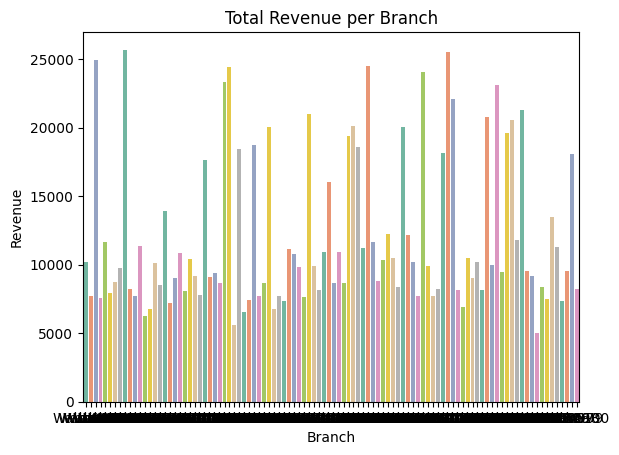

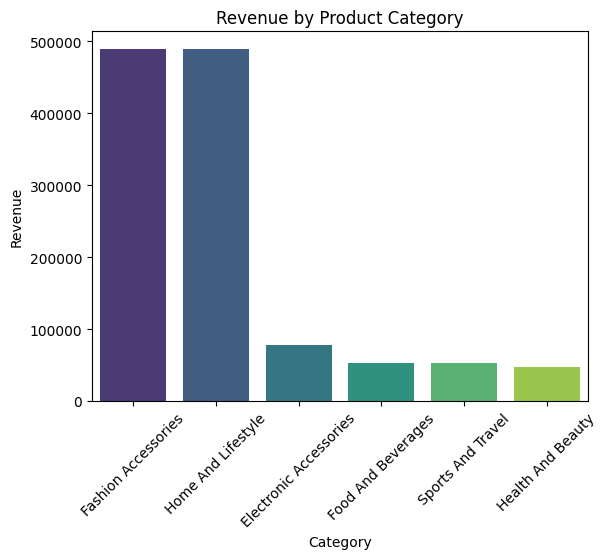

In [28]:
# Revenue trends across branches and categories.

# Total revenue per branch
branch_revenue = df.groupby("Branch")["total_amount"].sum().reset_index()

sns.barplot(data=branch_revenue, x="Branch", y="total_amount", hue="Branch", palette="Set2", legend=False)
plt.title("Total Revenue per Branch")
plt.ylabel("Revenue")
plt.xlabel("Branch")
plt.show()

# Total revenue per product category
category_revenue = df.groupby("category")["total_amount"].sum().reset_index().sort_values("total_amount", ascending=False)

sns.barplot(data=category_revenue, x="category", y="total_amount", hue="category", palette="viridis", legend=False)
plt.title("Revenue by Product Category")
plt.ylabel("Revenue")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.show()


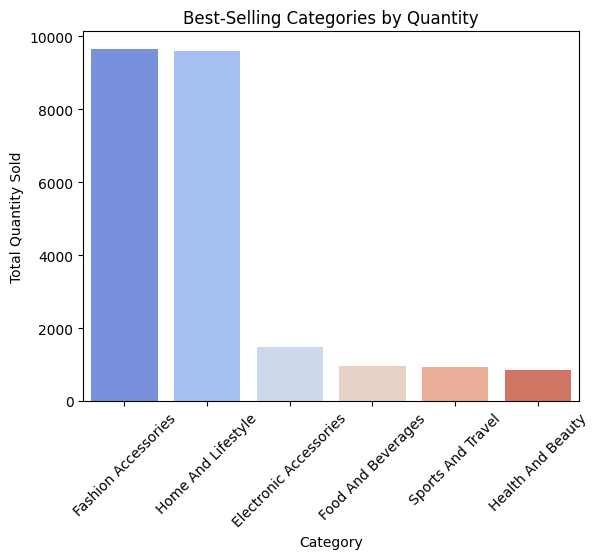

In [29]:
# Identifying best-selling product categories.

category_qty = df.groupby("category")["quantity"].sum().reset_index().sort_values("quantity", ascending=False)

sns.barplot(data=category_qty, x="category", y="quantity", hue="category", palette="coolwarm", legend=False)
plt.title("Best-Selling Categories by Quantity")
plt.ylabel("Total Quantity Sold")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.show()


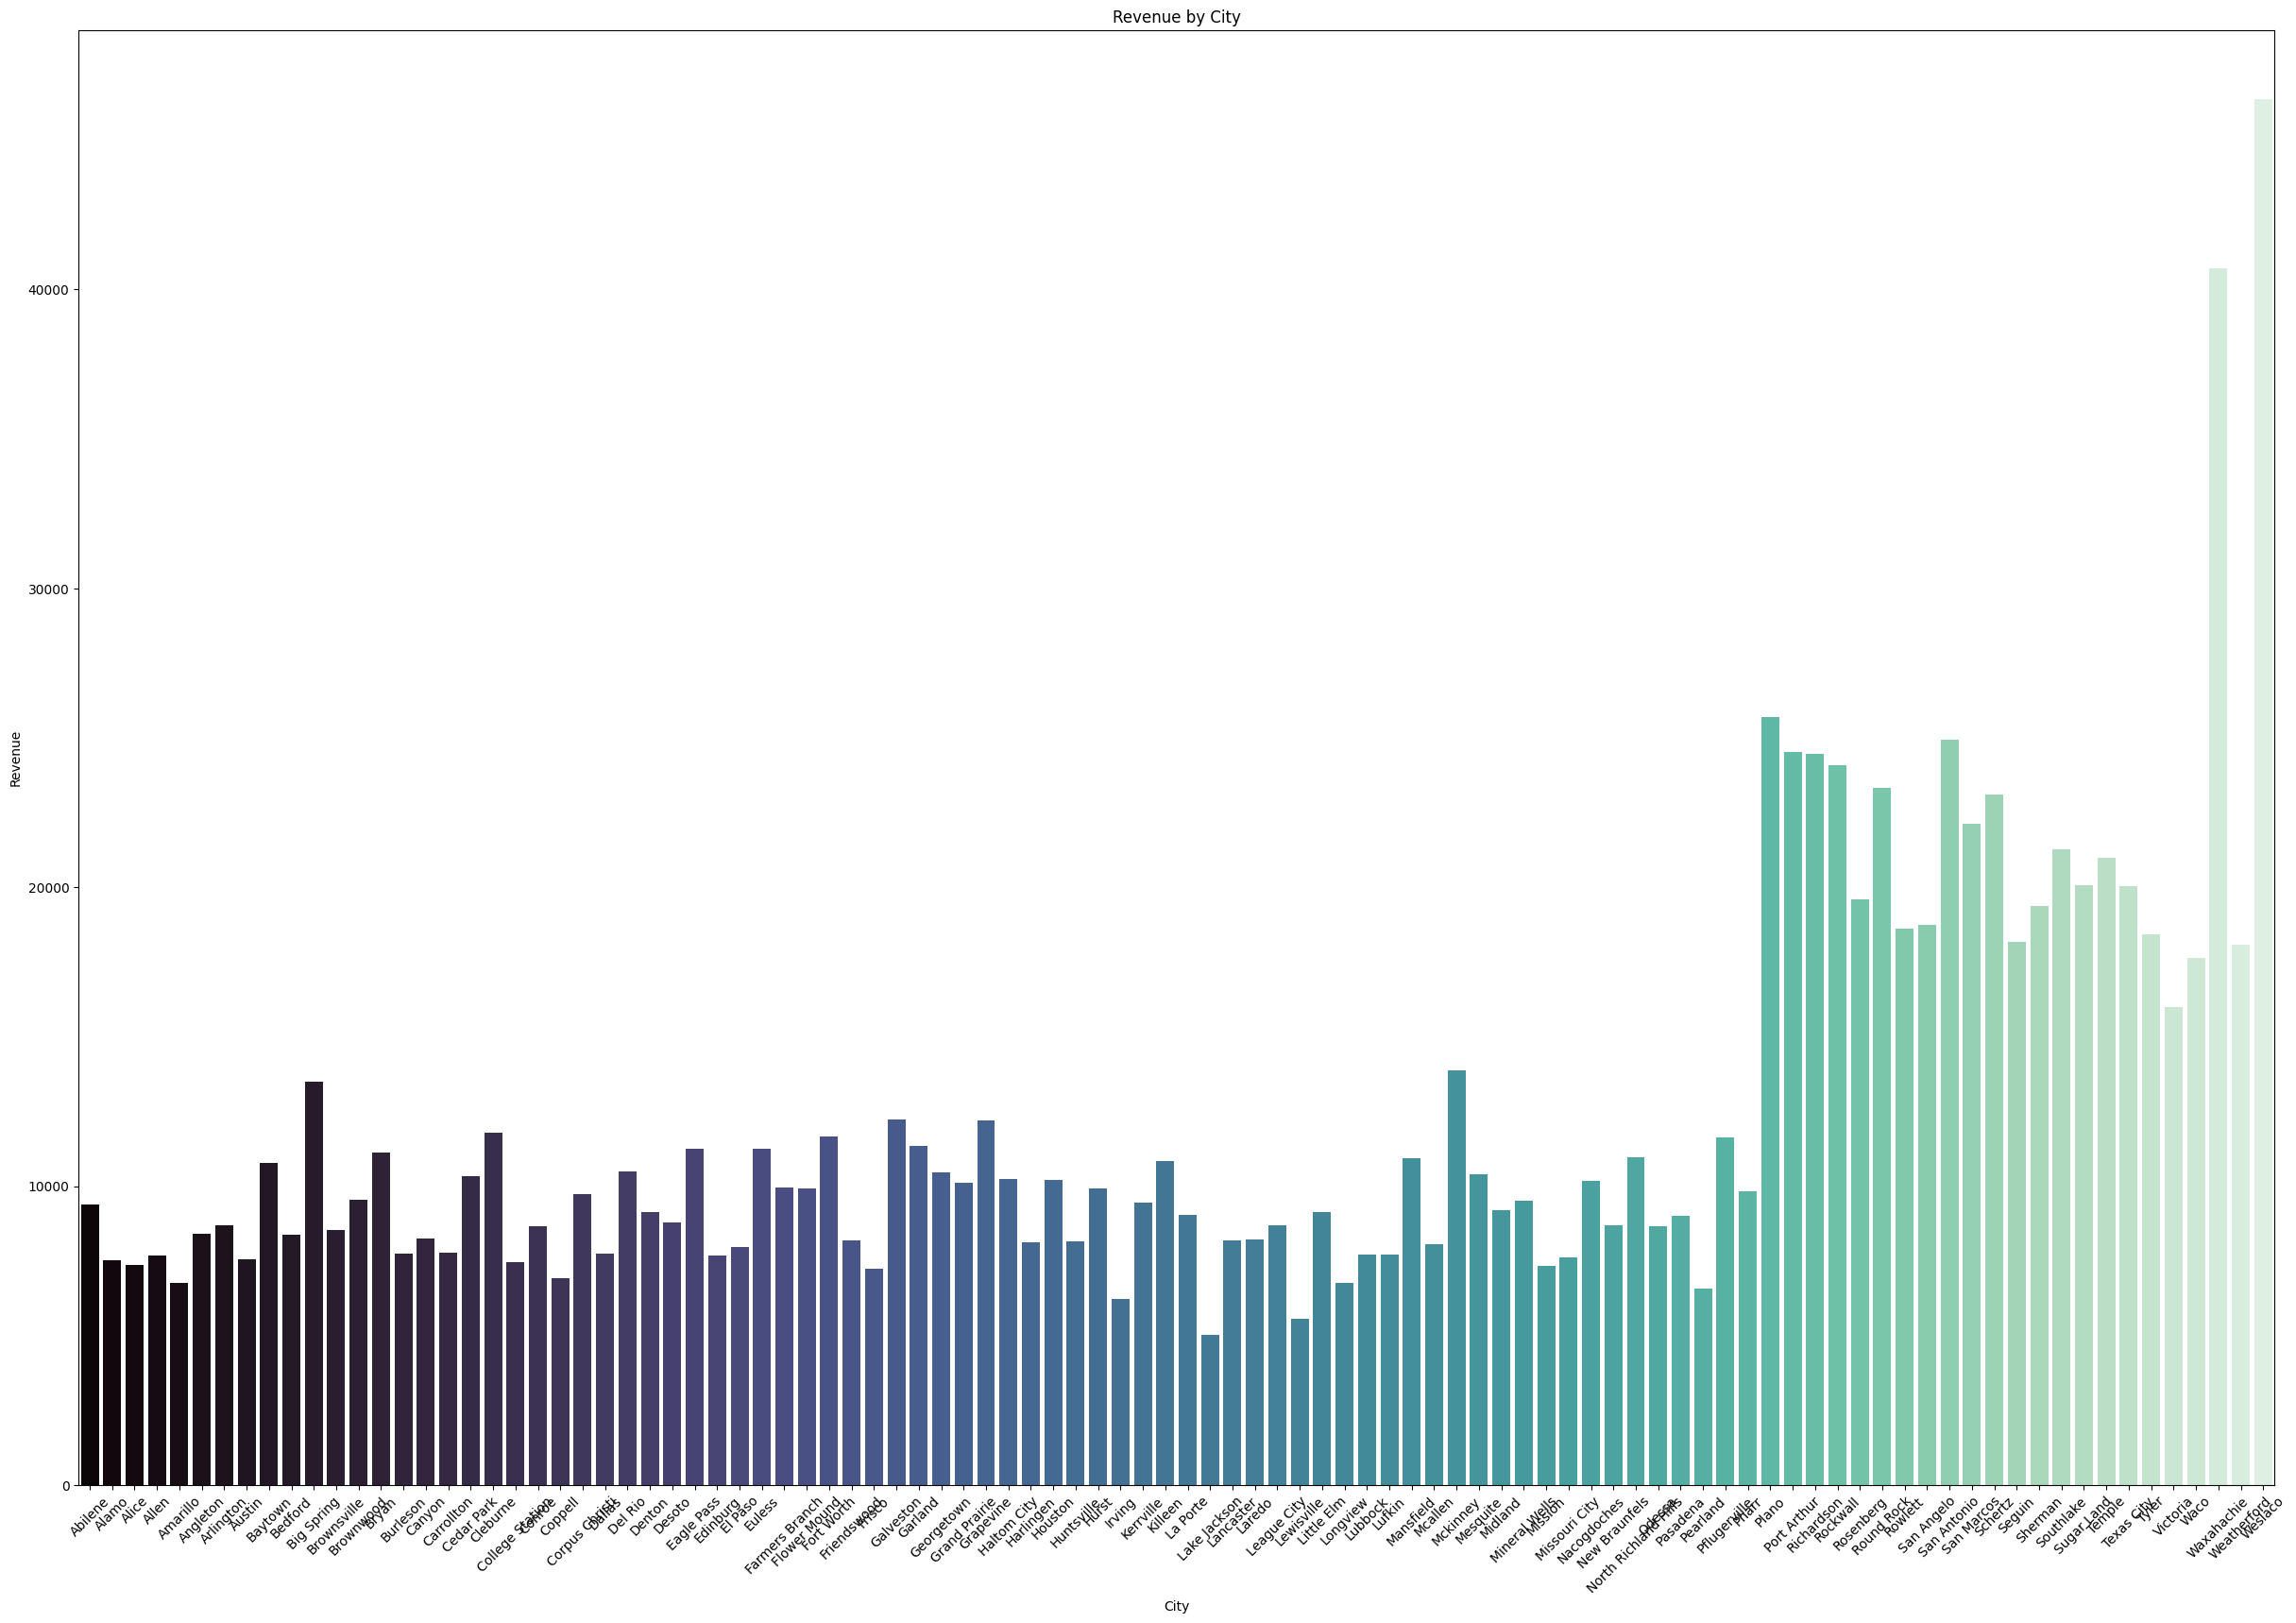

In [30]:
# Sales Performance by Time, City, and Payment Method

# Revenue by city
city_revenue = df.groupby("City")["total_amount"].sum().reset_index()
plt.figure(figsize=(30,20))
sns.barplot(data=city_revenue, x="City", y="total_amount",hue="City", palette="mako",legend=False)
plt.title("Revenue by City")
plt.ylabel("Revenue")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.show()


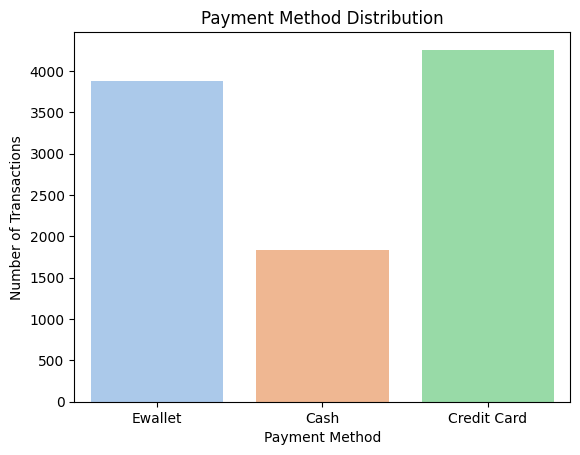

In [31]:
#Payment Method Distribution
plt.Figure(figsize=(14,6))
sns.countplot(data=df, x="payment_method", hue="payment_method",palette="pastel",legend=False)
plt.title("Payment Method Distribution")
plt.xlabel("Payment Method")
plt.ylabel("Number of Transactions")
plt.show()

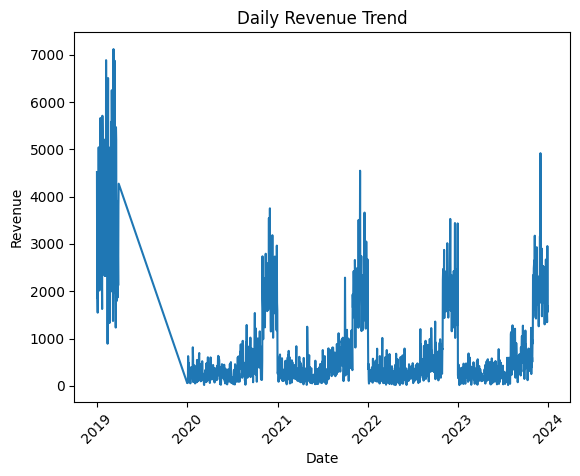

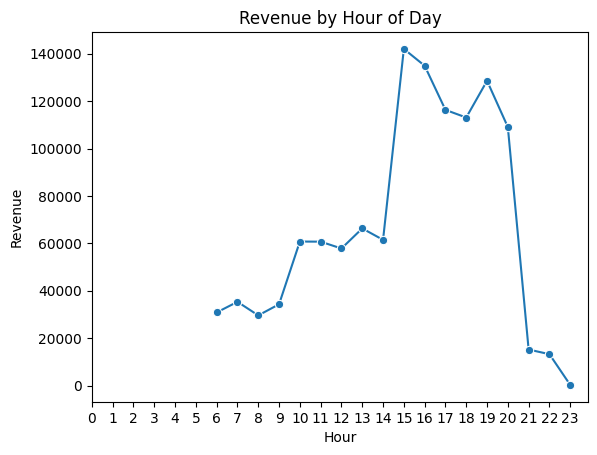

In [32]:
# Peak Sales Periods and Customer Buying Patterns

# Daily sales trends
daily_sales = df.groupby("date")["total_amount"].sum().reset_index()
# plt.figure(figsize=(14,6))
sns.lineplot(data=daily_sales, x="date", y="total_amount")
plt.title("Daily Revenue Trend")
plt.ylabel("Revenue")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.show()


# Sales by Hour of Day
df["hour"] = pd.to_datetime(df["time"].astype(str), format="%H:%M:%S").dt.hour
hourly_sales = df.groupby("hour")["total_amount"].sum().reset_index()

sns.lineplot(data=hourly_sales, x="hour", y="total_amount", marker="o")
plt.title("Revenue by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Revenue")
plt.xticks(range(0, 24))
plt.show()

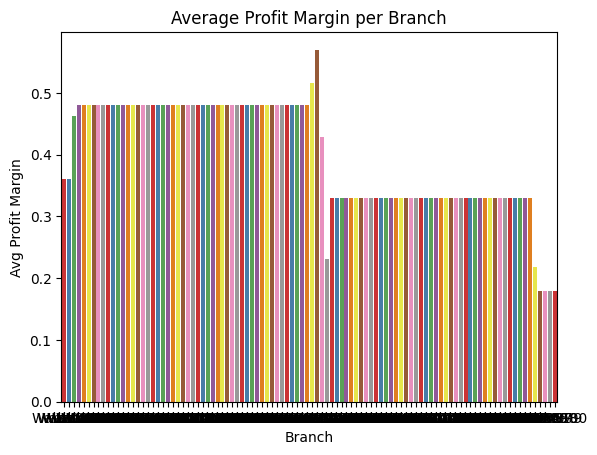

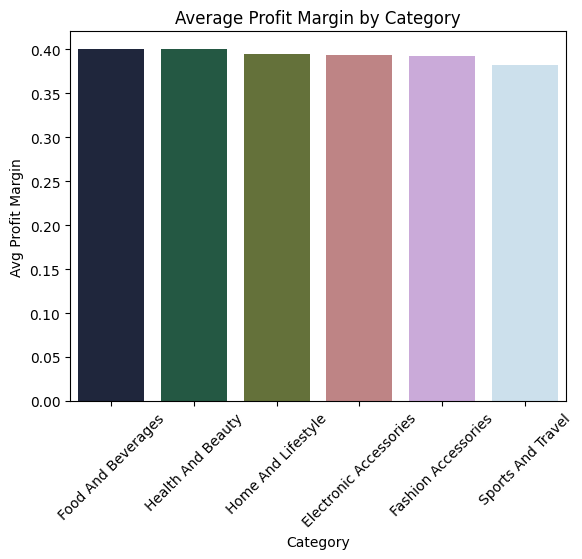

In [33]:
## Profit Margin Analysis by Branch and Category

# Profit margin by branch
branch_profit = df.groupby("Branch")["profit_margin"].mean().reset_index()

sns.barplot(data=branch_profit, x="Branch", y="profit_margin",hue="Branch", palette="Set1",legend=False)
plt.title("Average Profit Margin per Branch")
plt.ylabel("Avg Profit Margin")
plt.xlabel("Branch")
plt.show()

# Profit margin by category
category_profit = df.groupby("category")["profit_margin"].mean().reset_index().sort_values("profit_margin", ascending=False)

sns.barplot(data=category_profit, x="category", y="profit_margin",hue="category", palette="cubehelix",legend=False)
plt.title("Average Profit Margin by Category")
plt.ylabel("Avg Profit Margin")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.show()

In [39]:
print(df.columns.tolist())


['invoice_id', 'Branch', 'City', 'category', 'unit_price', 'quantity', 'date', 'time', 'payment_method', 'rating', 'profit_margin', 'total_amount', 'hour']


In [42]:
# ── MySQL connection (LOCAL INFILE disabled → batch INSERTs) ─────
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="k@liroot123",
    database="st_project_1",
    autocommit=True
)
cursor = conn.cursor()

insert_sql = """
INSERT INTO walmart_dataset
(invoice_id, branch, city, category, unit_price, quantity,
 date, time, payment_method, rating, profit_margin)
VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)
"""

rows = [
    (
        str(row['invoice_id']),
        str(row['Branch']),
        str(row['City']),
        str(row['category']),
        float(row['unit_price']),
        int(row['quantity']),
        row['date'],          # already datetime.date
        row['time'],          # already datetime.time
        str(row['payment_method']),
        float(row['rating']),
        float(row['profit_margin'])
    )
    for _, row in df.iterrows()
]

# Execute batch insert
cursor.executemany(insert_sql, rows)
print(f"{cursor.rowcount:,} rows inserted into walmart_dataset")

cursor.close()
conn.close()

9,969 rows inserted into walmart_dataset
